In [385]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizing and Normalizing data:
from sklearn.preprocessing import StandardScaler

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [345]:
file_loc = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv'
df = pd.read_csv(file_loc,)

In [346]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [347]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [348]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [349]:
df.shape

(891, 12)

In [350]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [351]:
df.shape

(891, 12)

In [352]:
df.drop(columns='Cabin', axis=1,inplace=True)

In [353]:
df.dropna(axis=0,inplace=True)

In [354]:
df.shape

(712, 11)

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


In [356]:
cont_data = df.select_dtypes(include=['int64','float64'])

cat_data= df.select_dtypes(include=['object'])

cont_columns = cont_data.columns

cat_columns = cat_data.columns

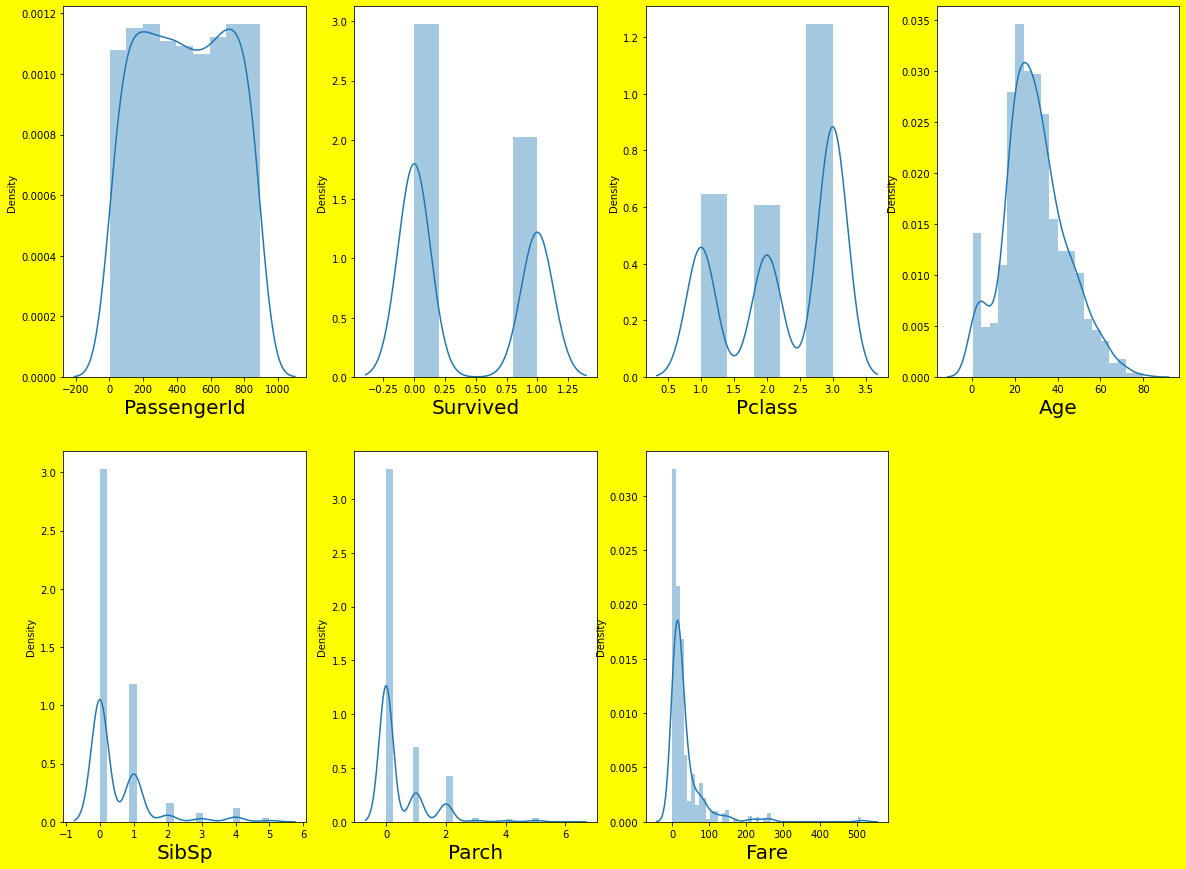

In [357]:
# Checking the distribution of continuous variables:

plt.figure(figsize=(20,15),facecolor='Yellow')
plotnumber = 1
for column in cont_data.columns:
    if plotnumber <= 7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [358]:
# Creating features: 

df['Name'] = df['Name'].str.split(',')

new_feat1 = []
for i in df.Name:
    new_feat1.append(i[0])
    
new_feat2 = []
for i in df.Name:
    new_feat2.append(i[1])
    
df['Name'] = new_feat2

df['Last Name'] = new_feat1

# Creating title name features: 


df['Name'] = df['Name'].str.split('.')

title = []
for i in df.Name:
    title.append(i[0])
    
df['Title'] = title

nms = []
for i in df.Name:
    nms.append(i[1])
    
df['Name'] = nms

df['Ticket'] = df['Ticket'].str.split()

coach = []
for i in df.Ticket:
    if len(i) == 2:
        coach.append(i[0])
    else:
        coach.append('NA')
        
df['Coach Details'] = coach

ticket_no = []
for i in df.Ticket:
    if len(i) == 2:
        ticket_no.append(i[1])
    else:
        ticket_no.append(i[0])
        
df['Ticket'] = ticket_no

fare_value = []
for i in df.Fare:
    if i < 168.96:
        fare_value.append('Low')
    elif i in range(168,384):
        fare_value.append('Medium')
    else:
        fare_value.append('High')

df['Fare Charged'] = fare_value

life_stage = []
for i in df.Age:
    if i in range(0,17):
        life_stage.append('1')
    elif i in range(17,40):
        life_stage.append('2')
    elif i in range(41,60):
        life_stage.append('3')
    else:
        life_stage.append('4')
        
df['Life Stages'] = life_stage

In [359]:
# Changing data types

df['Life Stages'] = df['Life Stages'].astype('int64')

In [360]:
df.dtypes

PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Embarked          object
Last Name         object
Title             object
Coach Details     object
Fare Charged      object
Life Stages        int64
dtype: object

In [361]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,Coach Details,Fare Charged,Life Stages
0,1,0,3,Owen Harris,male,22.0,1,0,21171,7.2500,S,Braund,Mr,A/5,Low,2
1,2,1,1,John Bradley (Florence Briggs Thayer),female,38.0,1,0,17599,71.2833,C,Cumings,Mrs,PC,Low,2
2,3,1,3,Laina,female,26.0,0,0,3101282,7.9250,S,Heikkinen,Miss,STON/O2.,Low,2
3,4,1,1,Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,NA,Low,2
4,5,0,3,William Henry,male,35.0,0,0,373450,8.0500,S,Allen,Mr,NA,Low,2


In [362]:
# Rearranging dataset:

df.iloc[:,[12,3,11,8,13,0,2,4,5,15,6,7,9,14,10,1]]

,Title,Name,Last Name,Ticket,Coach Details,PassengerId,Pclass,Sex,Age,Life Stages,SibSp,Parch,Fare,Fare Charged,Embarked,Survived
0,Mr,Owen Harris,Braund,21171,A/5,1,3,male,22.0,2,1,0,7.2500,Low,S,0
1,Mrs,John Bradley (Florence Briggs Thayer),Cumings,17599,PC,2,1,female,38.0,2,1,0,71.2833,Low,C,1
2,Miss,Laina,Heikkinen,3101282,STON/O2.,3,3,female,26.0,2,0,0,7.9250,Low,S,1
3,Mrs,Jacques Heath (Lily May Peel),Futrelle,113803,NA,4,1,female,35.0,2,1,0,53.1000,Low,S,1
4,Mr,William Henry,Allen,373450,NA,5,3,male,35.0,2,0,0,8.0500,Low,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,Mrs,William (Margaret Norton),Rice,382652,NA,886,3,female,39.0,2,0,5,29.1250,Low,Q,0
886,Rev,Juozas,Montvila,211536,NA,887,2,male,27.0,2,0,0,13.0000,Low,S,0
887,Miss,Margaret Edith,Graham,112053,NA,888,1,female,19.0,2,0,0,30.0000,Low,S,1
889,Mr,Karl Howell,Behr,111369,NA,890,1,male,26.0,2,0,0,30.0000,Low,C,1


In [363]:
# Selecting columns with categorical data and continuous data:

cont_data = df.select_dtypes(include=['int64','float64'])

cat_data= df.select_dtypes(include=['object'])

cont_columns = cont_data.columns

cat_columns = cat_data.columns

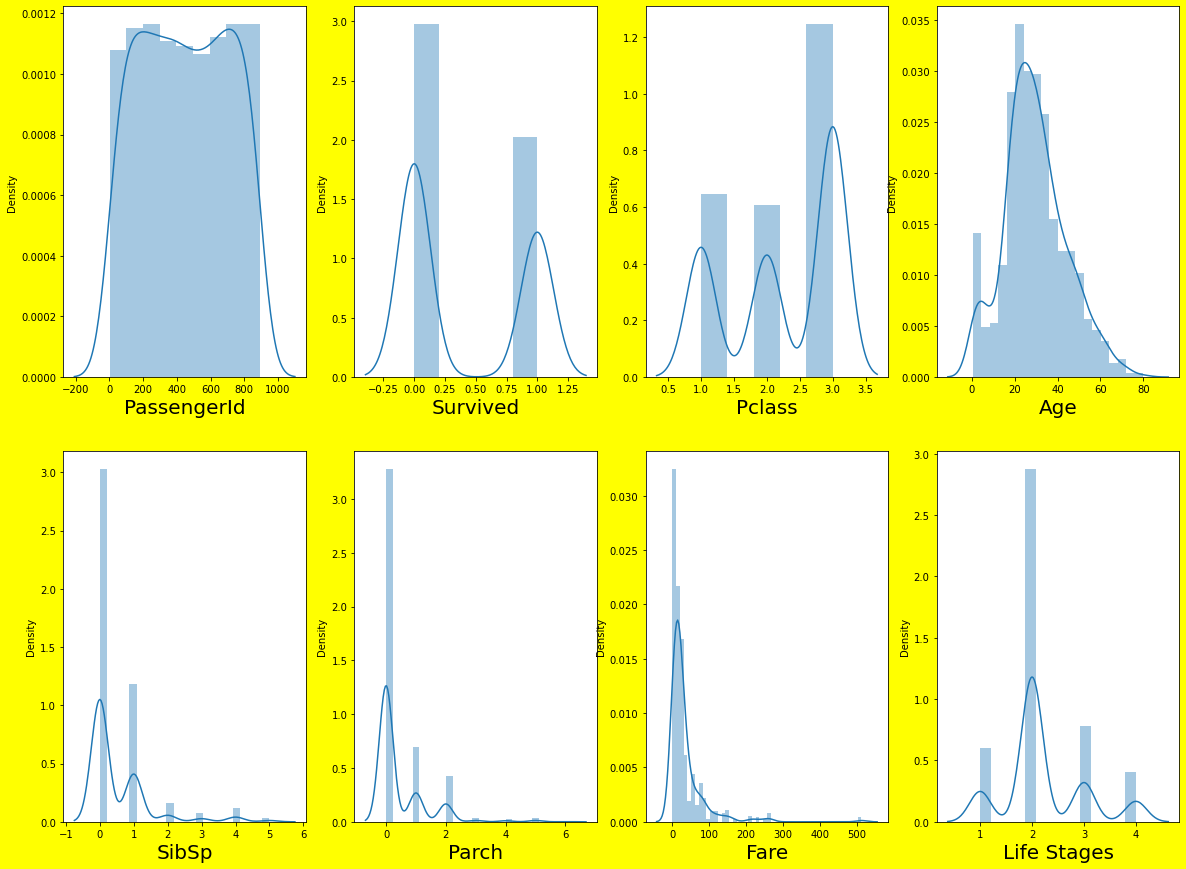

In [364]:
# Checking the distribution of continuous variables:

plt.figure(figsize=(20,15),facecolor='Yellow')
plotnumber = 1
for column in cont_data.columns:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [365]:
#checking for duplicates:

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
885    False
886    False
887    False
889    False
890    False
Length: 712, dtype: bool

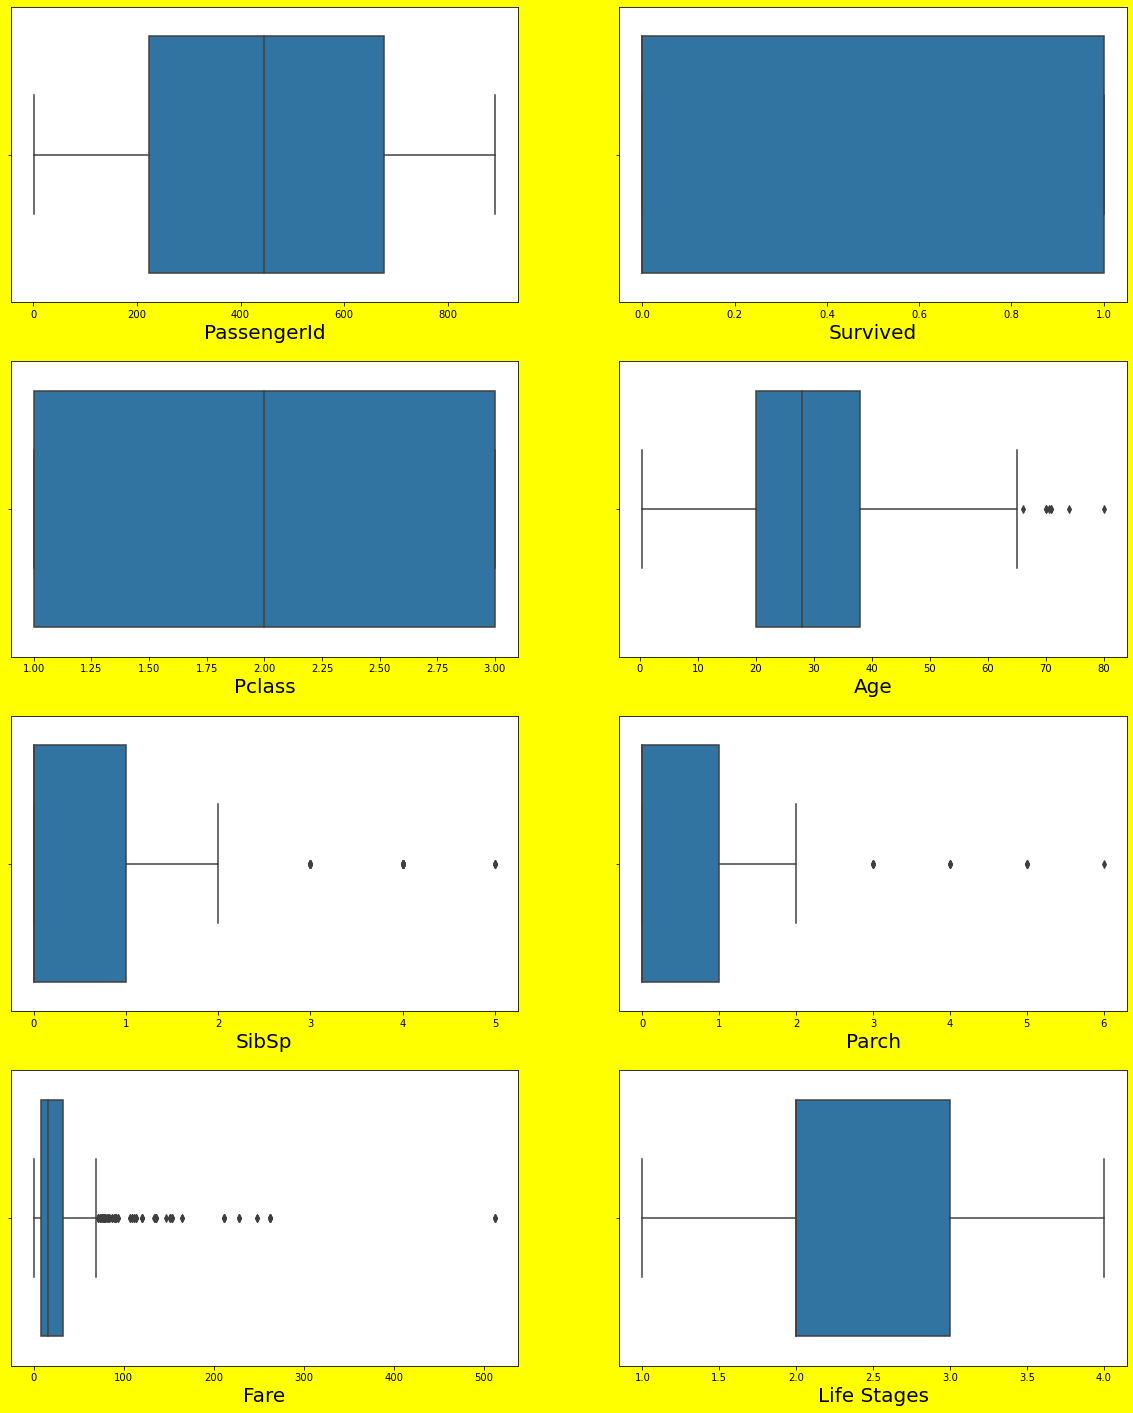

In [540]:
# Lets remove outliers and check the score:

plt.figure(figsize=(20,25),facecolor='Yellow')
plotnumber = 1
for col in df[cont_columns]:
    if plotnumber <= 8:
        ax = plt.subplot(4,2,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber += 1
plt.show()

In [367]:
# Checking value counts of features:

# Survivors:
print('Value counts of survivors:\n', df['Survived'].value_counts(),'\n\n')

# Age:
print('Value counts of travellors by age:\n',df['Age'].value_counts(),'\n\n')

# Life stage:
print('Value counts of travellors by life stage:\n',df['Life Stages'].value_counts(),'\n\n')

print('Unique Value counts of travellors by age:\n',df['Age'].value_counts().unique(),'\n\n')

print('Mainly age of travellors is divided into this much categories:\n',len(df['Age'].value_counts().unique()),'\n\n')

# Pclass:
print('Value counts of Pclass \n',df['Pclass'].value_counts(),'\n\n')

#SibSp:
print('Value counts of SibSp \n',df['SibSp'].value_counts(),'\n\n')

#Parch:
print('Value counts of Parch \n',df['Parch'].value_counts(),'\n\n')

#Embarked:
print('Value counts of Embarked \n',df['Embarked'].value_counts(),'\n\n')

# Title
print('Value counts on the basis of title of passengers \n',df['Title'].value_counts(),'\n\n')

# Coach Details
print('Value counts on the basis of Coach details \n',df['Coach Details'].value_counts(),'\n\n')

# Sex
print('Value counts of gender of passengers \n',df['Sex'].value_counts(),'\n\n')

# Fare charged:
print('Value counts of passengers whether they were charged low,medium or high: \n',df['Fare Charged'].value_counts(),'\n\n')




Value counts of survivors:
 0    424
1    288
Name: Survived, dtype: int64 


Value counts of travellors by age:
 24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64 


Value counts of travellors by life stage:
 2    439
3    119
1     92
4     62
Name: Life Stages, dtype: int64 


Unique Value counts of travellors by age:
 [30 27 26 25 24 23 22 20 18 17 15 14 13 12 10  9  8  7  6  5  4  3  2  1] 


Mainly age of travellors is divided into this much categories:
 24 


Value counts of Pclass 
 3    355
1    184
2    173
Name: Pclass, dtype: int64 


Value counts of SibSp 
 0    469
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64 


Value counts of Parch 
 0    519
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64 


Value counts of Embarked 
 S    554
C    130
Q     28
Name: Embarked, dtype: int64 


Value counts on the 

In [368]:
# Checking descriptive statistics of fare column:

df['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [546]:
df.groupby('Fare Charged').sum()['Survived']

Fare Charged
High       12
Low       274
Medium      2
Name: Survived, dtype: int64

In [369]:
# Grouping survivors on the basis of different features:

print('No. of males and females who survived: \n',df.groupby('Sex').sum()['Survived'],'\n\n')

print('Survivors on the basis of life stage: \n',df.groupby('Life Stages').sum()['Survived'],'\n\n')

print('Survivors on the basis of coach details: \n',df.groupby('Coach Details').sum()['Survived'],'\n\n')

print('Survivors on the basis of where they Embarked: \n',df.groupby('Embarked').sum()['Survived'],'\n\n')

print('Survivors on the basis of there Pclass: \n',df.groupby('Pclass').sum()['Survived'],'\n\n')

print('Survivors on the basis of there SibSp: \n',df.groupby('SibSp').sum()['Survived'],'\n\n')

print('Survivors on the basis of there Parch: \n',df.groupby('Parch').sum()['Survived'],'\n\n')

print('Survivors on the basis of there Fare: \n',df.groupby('Fare').sum()['Survived'],'\n\n')

print('Survivors on the basis of the Fare charged: \n',df.groupby('Fare Charged').sum()['Survived'],'\n\n')



No. of males and females who survived: 
 Sex
female    195
male       93
Name: Survived, dtype: int64 


Survivors on the basis of life stage: 
 Life Stages
1     48
2    172
3     48
4     20
Name: Survived, dtype: int64 


Survivors on the basis of coach details: 
 Coach Details
A./5.           0
A.5.            0
A/4             0
A/4.            0
A/5             1
A/5.            1
C               2
C.A.           13
C.A./SOTON      0
CA              0
CA.             1
F.C.            0
F.C.C.          4
NA            212
P/PP            1
PC             35
PP              2
S.C./PARIS      1
S.O./P.P.       0
S.O.C.          0
S.O.P.          0
S.P.            0
S.W./PP         1
SC              1
SC/AH           1
SC/PARIS        1
SC/Paris        2
SCO/W           0
SO/C            1
SOTON/O.Q.      1
SOTON/O2        0
SOTON/OQ        1
STON/O2.        3
SW/PP           1
W./C.           1
W.E.P.          0
W/C             0
WE/P            1
Name: Survived, dtype: int64 


Su

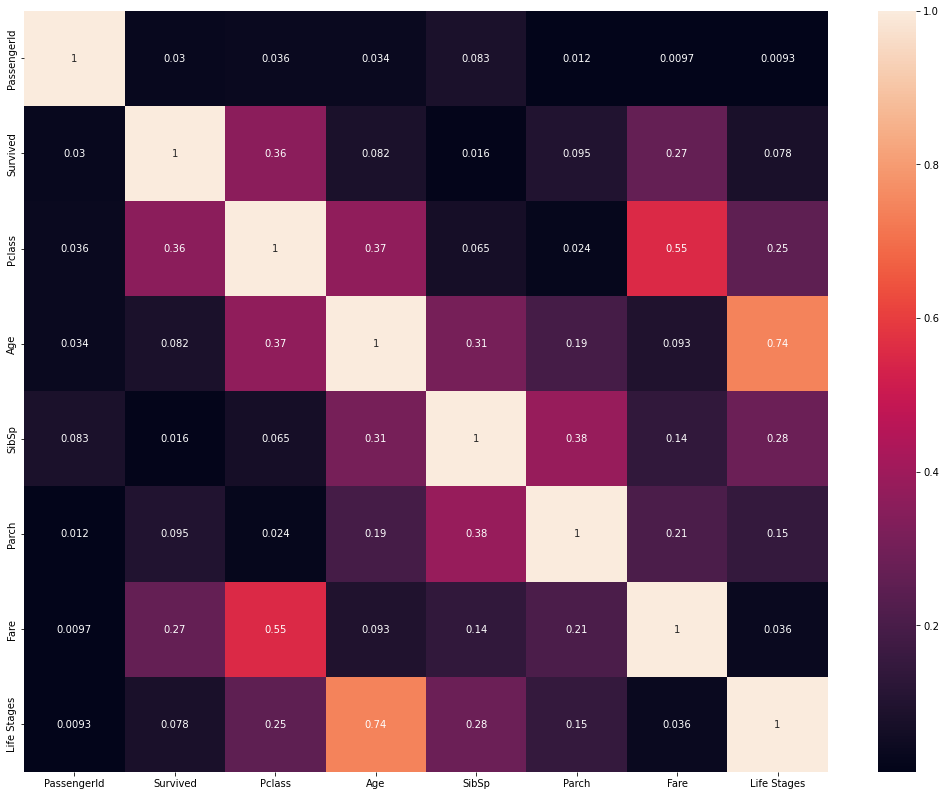

In [370]:
df_corr = df.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

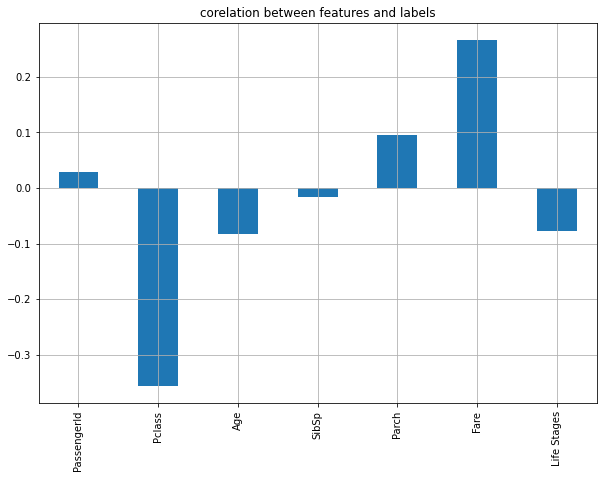

In [371]:
# Correlation between features and label:

df.drop(columns = 'Survived',axis = 1).corrwith(df.Survived).plot(kind='bar',grid=True,figsize=(10,7),title='corelation between features and labels')
plt.show()

Exploratory data analysis:

1. We have a total of (891, 12) rows and columns in a dataframe.

2. From the data, in Age column, 177 and 687 values from cabin column are missing. 
   Since 77% data of cabin column is missing we are dropping the complete column.
   Imputing age values with any random number would lead to misleading data so we 
   have also decided to drop the missing rows in age column.
   
3. From dataframe info, we can conclude that Survivor is our label and is a categorical 
   datatype which tells this is a classification problem.
   
   From column inspection, we have created new features using existing column data, details
   of which are given below:
   
   Title, Name and Last Name were extracted from Name column, 
   Ticket Number, Coach Details were extraced
   Life Stages were created using age column,
   Fare charged is divided into 3 classes whether low, medium or high.
   
   All these columns can give us some important information to predict survivors.
   
4. No duplicate values are found.

5. A lot of outliers can be observed in Fare, SibSp, Parch and Age column. If we delete 
   them we might lose a large amount of useful information so we have decided to keep the outliers.
   
6. Around 40% of passengers survived the disaster. 60% lost there lives.

7. 531 survivors i.e 71 %, are below 40 years of age.

8. The most survivors, 155 in numbers belonged to 3rd Pclass.

9. 519 value count belonged to 0 parch number.

10. 554 survivors embarked from Southampton.

11. More than 55 percent of passengers were male.

12. 536 survivors coach is unaware. 

13. From Fare column data, high skewness and variation can be observed, also it contails a large number of outliers.

    12 people who survived had given highest fare.
    274 people who survived had given lowest fare.
    Only 2 people who survived had given medium valued fare.

14. Pclass can be found to have the highest correlation with label. 


In [373]:
# Using get dummies to encode categorical features:

df_encoded = pd.get_dummies(df)

df_encoded

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Life Stages,Name_ (Ada E Hall),Name_ (Amelia Milley),...,Coach Details_SOTON/OQ,Coach Details_STON/O2.,Coach Details_SW/PP,Coach Details_W./C.,Coach Details_W.E.P.,Coach Details_W/C,Coach Details_WE/P,Fare Charged_High,Fare Charged_Low,Fare Charged_Medium
0,1,0,3,22.0,1,0,7.2500,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,2,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,2,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,2,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,39.0,0,5,29.1250,2,0,0,...,0,0,0,0,0,0,0,0,1,0
886,887,0,2,27.0,0,0,13.0000,2,0,0,...,0,0,0,0,0,0,0,0,1,0
887,888,1,1,19.0,0,0,30.0000,2,0,0,...,0,0,0,0,0,0,0,0,1,0
889,890,1,1,26.0,0,0,30.0000,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [374]:
# Seperating columns to check skewness:

sel_cols = ['PassengerId','Pclass','Name','Sex','Age','SibSp',
            'Parch','Ticket','Fare','Embarked','Last Name','Title',
            'Coach Details','Fare Charged','Life Stages']

In [375]:
df[sel_cols].skew().sort_values()

Pclass        -0.475604
PassengerId   -0.000512
Age            0.388881
Life Stages    0.741174
SibSp          2.515107
Parch          2.614177
Fare           4.667009
dtype: float64

In [514]:
# Splitting data into features and label:

y = df_encoded.Survived
X = df_encoded.drop('Survived',axis=1)

In [390]:
# Applying standard scaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [527]:
# Finding best random state for logistic regression model:

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=1)
    log_reg = LogisticRegression()
    log_reg.fit(x_train,y_train) 
    y_pred = log_reg.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Testing accuracy: ', acc, 'at random state', i)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('Max accuracy',maxAccu,'max random state',maxRS)

Testing accuracy:  0.8111888111888111 at random state 1
Max accuracy 0.8111888111888111 max random state 1
Testing accuracy:  0.8111888111888111 at random state 2
Testing accuracy:  0.8111888111888111 at random state 3
Testing accuracy:  0.8111888111888111 at random state 4
Testing accuracy:  0.8111888111888111 at random state 5
Testing accuracy:  0.8111888111888111 at random state 6
Testing accuracy:  0.8111888111888111 at random state 7
Testing accuracy:  0.8111888111888111 at random state 8
Testing accuracy:  0.8111888111888111 at random state 9
Testing accuracy:  0.8111888111888111 at random state 10
Testing accuracy:  0.8111888111888111 at random state 11
Testing accuracy:  0.8111888111888111 at random state 12
Testing accuracy:  0.8111888111888111 at random state 13
Testing accuracy:  0.8111888111888111 at random state 14
Testing accuracy:  0.8111888111888111 at random state 15
Testing accuracy:  0.8111888111888111 at random state 16
Testing accuracy:  0.8111888111888111 at rando

In [402]:
print('Best accuracy: ',maxAccu,'at random state: ',maxRS)

Best accuracy:  0.8111888111888111 at random state:  1


In [526]:
# Logistic Regression:

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=1)
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) 
pred_train_log_reg = log_reg.predict(x_train)
y_pred = log_reg.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_log_reg)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  100.0
Testing accuracy:  81.11888111888112
Confusion matrix: 
 [[76  9]
 [18 40]]
classification report:                precision    recall  f1-score   support

           0       0.81      0.89      0.85        85
           1       0.82      0.69      0.75        58

    accuracy                           0.81       143
   macro avg       0.81      0.79      0.80       143
weighted avg       0.81      0.81      0.81       143



In [422]:
# Finding best random state for :Decision tree classifier

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=1)
    dtc = DecisionTreeClassifier()
    dtc.fit(x_train,y_train) 
    pred_train_dtc = dtc.predict(x_train)
    y_pred = dtc.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training accuracy: ', accuracy_score(y_train,pred_train_dtc)*100)
    print('Testing accuracy: ', acc*100)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('Max accuracy',maxAccu,'max random state',maxRS)
    


Training accuracy:  100.0
Testing accuracy:  81.81818181818183
Max accuracy 0.8181818181818182 max random state 1
Training accuracy:  100.0
Testing accuracy:  80.41958041958041
Training accuracy:  100.0
Testing accuracy:  83.21678321678321
Max accuracy 0.8321678321678322 max random state 3
Training accuracy:  100.0
Testing accuracy:  79.02097902097903
Training accuracy:  100.0
Testing accuracy:  79.02097902097903
Training accuracy:  100.0
Testing accuracy:  81.11888111888112
Training accuracy:  100.0
Testing accuracy:  81.81818181818183
Training accuracy:  100.0
Testing accuracy:  81.81818181818183
Training accuracy:  100.0
Testing accuracy:  80.41958041958041
Training accuracy:  100.0
Testing accuracy:  80.41958041958041
Training accuracy:  100.0
Testing accuracy:  81.81818181818183
Training accuracy:  100.0
Testing accuracy:  83.91608391608392
Max accuracy 0.8391608391608392 max random state 12
Training accuracy:  100.0
Testing accuracy:  79.72027972027972
Training accuracy:  100.0
T

In [525]:
print('Best accuracy: ',maxAccu,'at random state: ',maxRS)

Best accuracy:  0.7972027972027972 at random state:  1


In [479]:
# Best result for Decision Tree Classifier:

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train) 
pred_train_dtc = dtc.predict(x_train)
y_pred = dtc.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_dtc)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  100.0
Testing accuracy:  83.91608391608392
Confusion matrix: 
 [[78  6]
 [17 42]]
classification report:                precision    recall  f1-score   support

           0       0.82      0.93      0.87        84
           1       0.88      0.71      0.79        59

    accuracy                           0.84       143
   macro avg       0.85      0.82      0.83       143
weighted avg       0.84      0.84      0.84       143



In [480]:
# HYPER PARAMETER TUNING for DTC:

# Tuning parameters using GridSearchCV:

params = {'criterion':['gini','entrophy'],'max_depth':range(0,20)} # at which rate our model should learn

grd_dtc = GridSearchCV(dtc,param_grid=params)

grd_dtc.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entrophy'],
                         'max_depth': range(0, 20)})

In [481]:
grd_dtc.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [482]:
dtc_f = DecisionTreeClassifier(criterion = 'gini',  max_depth = 6)
dtc_f.fit(x_train,y_train) 
pred_train_dtc_f = dtc.predict(x_train)
y_pred = dtc_f.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_dtc_f)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  100.0
Testing accuracy:  82.51748251748252
Confusion matrix: 
 [[75  9]
 [16 43]]
classification report:                precision    recall  f1-score   support

           0       0.82      0.89      0.86        84
           1       0.83      0.73      0.77        59

    accuracy                           0.83       143
   macro avg       0.83      0.81      0.82       143
weighted avg       0.83      0.83      0.82       143



In [432]:
# Finding best random state for Random Forest Classifier:

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=1)
    rfc = RandomForestClassifier()
    rfc.fit(x_train,y_train) 
    pred_train_rfc = rfc.predict(x_train)
    y_pred = rfc.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training accuracy: ', accuracy_score(y_train,pred_train_rfc)*100)
    print('Testing accuracy: ', acc*100)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('Max accuracy',maxAccu,'max random state',maxRS)
    


Training accuracy:  100.0
Testing accuracy:  79.02097902097903
Max accuracy 0.7902097902097902 max random state 1
Training accuracy:  100.0
Testing accuracy:  78.32167832167832
Training accuracy:  100.0
Testing accuracy:  79.72027972027972
Max accuracy 0.7972027972027972 max random state 3
Training accuracy:  100.0
Testing accuracy:  83.21678321678321
Max accuracy 0.8321678321678322 max random state 4
Training accuracy:  100.0
Testing accuracy:  78.32167832167832
Training accuracy:  100.0
Testing accuracy:  79.72027972027972
Training accuracy:  99.82425307557118
Testing accuracy:  78.32167832167832
Training accuracy:  100.0
Testing accuracy:  81.11888111888112
Training accuracy:  100.0
Testing accuracy:  79.02097902097903
Training accuracy:  100.0
Testing accuracy:  80.41958041958041
Training accuracy:  100.0
Testing accuracy:  79.72027972027972
Training accuracy:  100.0
Testing accuracy:  76.92307692307693
Training accuracy:  100.0
Testing accuracy:  79.72027972027972
Training accurac

In [433]:
print('Best accuracy: ',maxAccu,'at random state: ',maxRS)

Best accuracy:  0.8321678321678322 at random state:  4


In [438]:
# Best result for Random forest Classifier:

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=4)
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train) 
pred_train_rfc = rfc.predict(x_train)
y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_rfc)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  100.0
Testing accuracy:  83.21678321678321
Confusion matrix: 
 [[78  9]
 [15 41]]
classification report:                precision    recall  f1-score   support

           0       0.84      0.90      0.87        87
           1       0.82      0.73      0.77        56

    accuracy                           0.83       143
   macro avg       0.83      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143



In [439]:
# Finding best random state for SVC:

maxAccu = 0
maxRS = 0

for i in range(1,200):
    svc = SVC()
    svc.fit(x_train,y_train) 
    pred_train_svc = svc.predict(x_train)
    y_pred = svc.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training accuracy: ', accuracy_score(y_train,pred_train_svc)*100)
    print('Testing accuracy: ', acc*100)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('Max accuracy',maxAccu,'max random state',maxRS)
    


Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Max accuracy 0.6573426573426573 max random state 1
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing accuracy:  65.73426573426573
Training accuracy:  99.82425307557118
Testing acc

In [440]:
print('Best accuracy: ',maxAccu,'at random state: ',maxRS)

Best accuracy:  0.6573426573426573 at random state:  1


In [442]:
# Best result for SVC: 

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=1)
svc = SVC()
svc.fit(x_train,y_train) 
pred_train_svc = svc.predict(x_train)
y_pred = svc.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_svc)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  99.82425307557118
Testing accuracy:  64.33566433566433
Confusion matrix: 
 [[84  1]
 [50  8]]
classification report:                precision    recall  f1-score   support

           0       0.63      0.99      0.77        85
           1       0.89      0.14      0.24        58

    accuracy                           0.64       143
   macro avg       0.76      0.56      0.50       143
weighted avg       0.73      0.64      0.55       143



In [443]:
# Finding best random state for KNN:

maxAccu = 0
maxRS = 0

for i in range(1,200):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train) 
    pred_train_knn = knn.predict(x_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training accuracy: ', accuracy_score(y_train,pred_train_knn)*100)
    print('Testing accuracy: ', acc*100)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('Max accuracy',maxAccu,'max random state',maxRS)
    


Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Max accuracy 0.6013986013986014 max random state 1
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Training accuracy:  61.51142355008787

In [446]:
print('Best accuracy: ',maxAccu,'at random state: ',maxRS)

Best accuracy:  0.6013986013986014 at random state:  1


In [445]:
# Best result KNN:

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=1)
knn = KNeighborsClassifier()
knn.fit(x_train,y_train) 
pred_train_knn = knn.predict(x_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_knn)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  61.511423550087876
Testing accuracy:  60.13986013986013
Confusion matrix: 
 [[85  0]
 [57  1]]
classification report:                precision    recall  f1-score   support

           0       0.60      1.00      0.75        85
           1       1.00      0.02      0.03        58

    accuracy                           0.60       143
   macro avg       0.80      0.51      0.39       143
weighted avg       0.76      0.60      0.46       143



In [448]:
# Finding best random state for GBDTC:

maxAccu = 0
maxRS = 0

for i in range(1,200):
    gbdt_clf = GradientBoostingClassifier()
    gbdt_clf.fit(x_train,y_train) 
    pred_train_gbdt_clf = gbdt_clf.predict(x_train)
    y_pred = gbdt_clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training accuracy: ', accuracy_score(y_train,pred_train_gbdt_clf)*100)
    print('Testing accuracy: ', acc*100)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('Max accuracy',maxAccu,'max random state',maxRS)
    


Training accuracy:  87.69771528998243
Testing accuracy:  77.62237762237763
Max accuracy 0.7762237762237763 max random state 1
Training accuracy:  88.57644991212655
Testing accuracy:  78.32167832167832
Max accuracy 0.7832167832167832 max random state 2
Training accuracy:  89.103690685413
Testing accuracy:  76.92307692307693
Training accuracy:  90.68541300527241
Testing accuracy:  78.32167832167832
Training accuracy:  88.92794376098419
Testing accuracy:  79.02097902097903
Max accuracy 0.7902097902097902 max random state 5
Training accuracy:  89.45518453427064
Testing accuracy:  79.02097902097903
Training accuracy:  88.04920913884007
Testing accuracy:  76.92307692307693
Training accuracy:  88.22495606326889
Testing accuracy:  77.62237762237763
Training accuracy:  87.69771528998243
Testing accuracy:  76.92307692307693
Training accuracy:  88.04920913884007
Testing accuracy:  76.92307692307693
Training accuracy:  88.04920913884007
Testing accuracy:  76.22377622377621
Training accuracy:  88.9

In [453]:
print('Best accuracy: ',maxAccu,'at random state: ',maxRS)

Best accuracy:  0.7972027972027972 at random state:  58


In [454]:
# Gradient Boosted Trees Classifier 

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20 , random_state=58)
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train) 
pred_train_gbdt_clf = gbdt_clf.predict(x_train)
y_pred = gbdt_clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_gbdt_clf)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  90.33391915641477
Testing accuracy:  83.91608391608392
Confusion matrix: 
 [[73  8]
 [15 47]]
classification report:                precision    recall  f1-score   support

           0       0.83      0.90      0.86        81
           1       0.85      0.76      0.80        62

    accuracy                           0.84       143
   macro avg       0.84      0.83      0.83       143
weighted avg       0.84      0.84      0.84       143



In [455]:
# HYPER PARAMETER TUNING:

# Tuning parameters using GridSearchCV:

params = {'max_depth':range(4,8),
          'min_samples_split':range(2,8,2),
          'learning_rate':np.arange(0.1,0.3)} # at which rate our model should learn

grd = GridSearchCV(gbdt_clf,param_grid=params)

grd.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [456]:
grd.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2}

In [464]:
# Instantiating gradient boosting classifier:

gbdt_clf_f = GradientBoostingClassifier(learning_rate=0.1, max_depth=7, min_samples_split=2)

# Training the model
gbdt_clf_f.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=7)

In [465]:
pred_train_gbdt_clf_f = gbdt_clf_f.predict(x_train)
y_pred = gbdt_clf_f.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_gbdt_clf_f)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  100.0
Testing accuracy:  82.51748251748252
Confusion matrix: 
 [[71 10]
 [15 47]]
classification report:                precision    recall  f1-score   support

           0       0.83      0.88      0.85        81
           1       0.82      0.76      0.79        62

    accuracy                           0.83       143
   macro avg       0.83      0.82      0.82       143
weighted avg       0.83      0.83      0.82       143



In [568]:
# Using ada boost model:

from sklearn.ensemble import AdaBoostClassifier

# Finding best random state for GBDTC:

maxAccu = 0
maxRS = 0

for i in range(1,200):
    ada = AdaBoostClassifier()
    ada.fit(x_train,y_train)
    y_pred = ada.predict(x_test)
    pred_train_ada = ada.predict(x_train)
    y_pred = ada.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print('Training accuracy: ', accuracy_score(y_train,pred_train_ada)*100)
    print('Testing accuracy: ', acc*100)
    
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        print('Max accuracy',maxAccu,'max random state',maxRS)
    

Training accuracy:  87.87346221441125
Testing accuracy:  79.72027972027972
Max accuracy 0.7972027972027972 max random state 1
Training accuracy:  88.04920913884007
Testing accuracy:  81.11888111888112
Max accuracy 0.8111888111888111 max random state 2
Training accuracy:  89.27943760984182
Testing accuracy:  81.11888111888112
Training accuracy:  88.40070298769771
Testing accuracy:  79.72027972027972
Training accuracy:  89.27943760984182
Testing accuracy:  81.11888111888112
Training accuracy:  88.04920913884007
Testing accuracy:  81.11888111888112
Training accuracy:  89.27943760984182
Testing accuracy:  81.11888111888112
Training accuracy:  89.27943760984182
Testing accuracy:  81.81818181818183
Max accuracy 0.8181818181818182 max random state 8
Training accuracy:  89.27943760984182
Testing accuracy:  81.11888111888112
Training accuracy:  89.27943760984182
Testing accuracy:  81.11888111888112
Training accuracy:  88.22495606326889
Testing accuracy:  80.41958041958041
Training accuracy:  88

In [569]:
print('Best accuracy: ',maxAccu,'at random state: ',maxRS)

Best accuracy:  0.8181818181818182 at random state:  8


In [570]:
# HyperParameter tuning using Randomised Search CV :

from sklearn.model_selection import RandomizedSearchCV

params = {'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.3,0.4]}

rnd = RandomizedSearchCV(ada,param_distributions=params)

In [571]:
rnd.fit(x_train,y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [572]:
rnd.best_estimator_

AdaBoostClassifier(learning_rate=0.3, n_estimators=60)

In [573]:
ada_boosted = AdaBoostClassifier(learning_rate=0.3, n_estimators=60,random_state=8)
ada_boosted.fit(x_train,y_train)
yb_pred = ada_boosted.predict(x_test)
pred_train_ada = ada.predict(x_train)
y_pred = ada.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_ada)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  89.27943760984182
Testing accuracy:  81.81818181818183
Confusion matrix: 
 [[70 11]
 [15 47]]
classification report:                precision    recall  f1-score   support

           0       0.82      0.86      0.84        81
           1       0.81      0.76      0.78        62

    accuracy                           0.82       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



In [574]:
# Lets plot ROC AUC curve to choose best model:

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

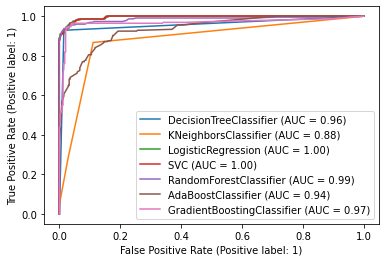

In [575]:
# Lets check ROC AUC Curve for fitted models on training data: (True +ive Rate/False +ive Rate)

disp = plot_roc_curve(dtc,x_train,y_train)

plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)

plot_roc_curve(log_reg,x_train,y_train,ax=disp.ax_)

plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)

plot_roc_curve(ada_boosted,x_train,y_train,ax=disp.ax_)

plot_roc_curve(gbdt_clf_f,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# This result is on training data.

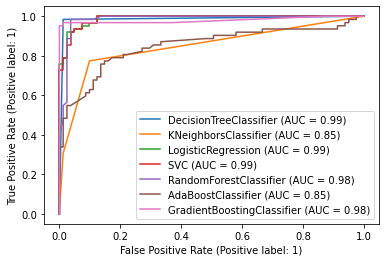

In [576]:
# Lets check ROC AUC Curve for fitted models on testing data: (True +ive Rate/False +ive Rate)

disp = plot_roc_curve(dtc,x_test,y_test)

plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)

plot_roc_curve(log_reg,x_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)

plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)

plot_roc_curve(gbdt_clf_f,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# This result is on training data.

In [581]:
# From the result of ROC Curve , we will use LogisticRegression Model:

log_reg = LogisticRegression() 
log_reg.fit(x_train,y_train)
log_reg.score(x_train,y_train)

lr.score(x_test,y_test) 
y_pred = log_reg.predict(x_test)
y_pred



array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [582]:
# Model accuracy: how good is our lr model?
accuracy = accuracy_score(y_test,y_pred) # here we are comparing 
                                         # predicted value vs (y)testing data
accuracy # Accuracy represents how good is our logistic model

0.7622377622377622

In [583]:
# Confusion Matrix:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[73,  8],
       [26, 36]], dtype=int64)

In [584]:
from sklearn.metrics import classification_report
clr = classification_report(y_test,y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        81
           1       0.82      0.58      0.68        62

    accuracy                           0.76       143
   macro avg       0.78      0.74      0.75       143
weighted avg       0.77      0.76      0.75       143



In [585]:
# Roc curve will give true +ive rate , false pr and threshold:

fpr,tpr,threshold = roc_curve(y_test,y_pred)
print(fpr,'\t',tpr,'\t',threshold)

[0.         0.09876543 1.        ] 	 [0.         0.58064516 1.        ] 	 [2 1 0]


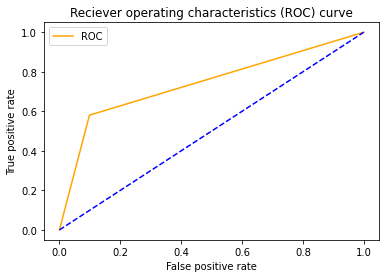

In [588]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue', linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics (ROC) curve')
plt.legend()
plt.show()

In [589]:
# How much area it is covering:
auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.7409398645957785

In [590]:
# Lets also cross check with adaboost:

ada_boosted = AdaBoostClassifier()

ada_boosted.fit(x_train,y_train)

yb_pred = ada_boosted.predict(x_test)

In [591]:
pred_train_ada = ada.predict(x_train)
y_pred = ada.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train,pred_train_ada)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

Training accuracy:  89.27943760984182
Testing accuracy:  81.81818181818183
Confusion matrix: 
 [[70 11]
 [15 47]]
classification report:                precision    recall  f1-score   support

           0       0.82      0.86      0.84        81
           1       0.81      0.76      0.78        62

    accuracy                           0.82       143
   macro avg       0.82      0.81      0.81       143
weighted avg       0.82      0.82      0.82       143



In [592]:
# Model accuracy: how good is our ada model?
accuracy = accuracy_score(y_test,y_pred) # here we are comparing 
                                         # predicted value vs (y)testing data
accuracy # Accuracy represents how good is our logistic model

0.8181818181818182

In [593]:
# Confusion Matrix:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[70, 11],
       [15, 47]], dtype=int64)

In [594]:
# Roc curve will give true +ive rate , false pr and threshold:

fpr,tpr,threshold = roc_curve(y_test,y_pred)
print(fpr,'\t',tpr,'\t',threshold)

[0.         0.13580247 1.        ] 	 [0.         0.75806452 1.        ] 	 [2 1 0]


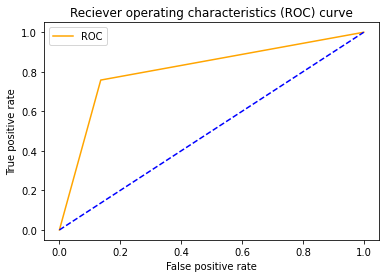

In [595]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue', linestyle = '--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever operating characteristics (ROC) curve')
plt.legend()
plt.show()

In [596]:
# How much area it is covering:
auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.8111310234966149

In [597]:
# Creating pipeline:

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ada_boosted',AdaBoostClassifier(learning_rate=0.6, n_estimators=71))])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

accuracy_score(y_test,y_pred)


0.7762237762237763

In [598]:
# Saving model to pickle string

import pickle 
saved_model = pickle.dumps(pipe) 
pipe_pickle = pickle.loads(saved_model)
pipe_pickle.predict(x_test) # predicting testing data


array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0], dtype=int64)